# Load Packages

In [1]:
# scikit-learn, scikit-image are needed
# If those packages are missed, then, install them by using the following command
# pip install scikit-learn scikit-image

import os

import sklearn.datasets
import sklearn.linear_model
import sklearn.svm
import sklearn.tree
import sklearn.ensemble
import sklearn.model_selection
import sklearn.metrics

import skimage.io
import skimage.transform
import skimage.color

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Load Additional Packages (if you want to use other modules in Scikit Learn)

In [2]:
# Load additional scikit learn packages! if you need
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
import joblib
import pickle

# Load Data Points (Do not modify the following block)

In [3]:
image_size = 64
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

images = []
y = []
for i in labels:
    folderPath = os.path.join('./tumor_dataset/Training',i)
    for j in os.listdir(folderPath):
        img = skimage.io.imread(os.path.join(folderPath,j),)
        img = skimage.transform.resize(img,(image_size,image_size))
        img = skimage.color.rgb2gray(img)
        images.append(img)
        y.append(i)

images = np.array(images)

X = images.reshape((-1, image_size**2))
y = np.array(y)

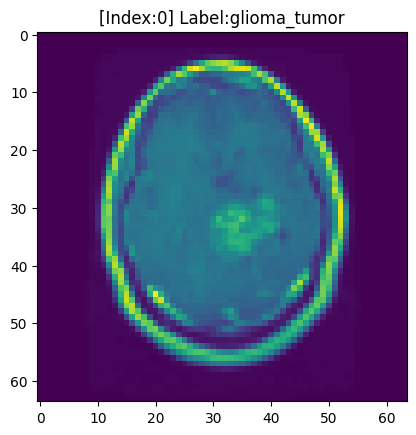

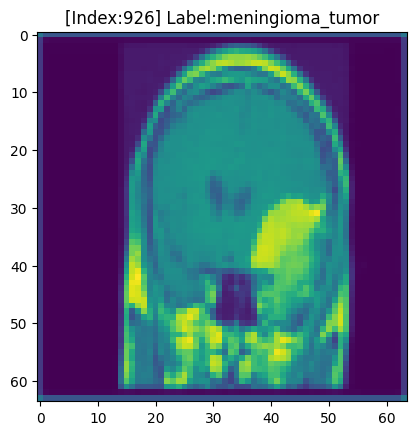

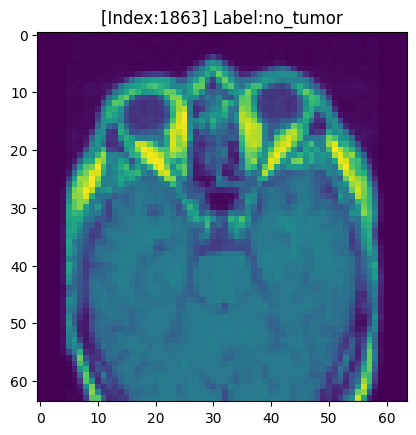

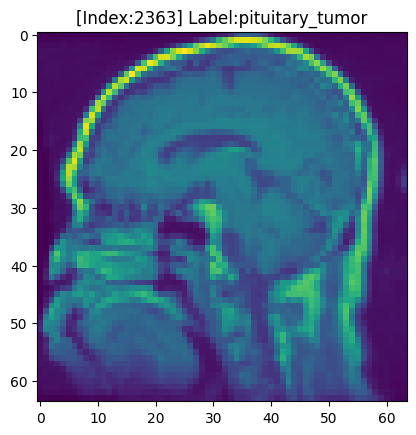

In [4]:
j = 0
for i in range(len(y)):
    if y[i] in labels[j]:
        plt.imshow(images[i])
        plt.title("[Index:{}] Label:{}".format(i, y[i]))
        plt.show()
        j += 1
    if j >= len(labels):
        break

In [5]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

# Classification with Scikit Learn Library (Programming Assignment)
### Variable Explanation (Do not change variable names)
- 'X_train' is feature vectors of training dataset
- 'y_train' is target labels of training dataset
- 'X_test' is feature vectors of test dataset
- 'y_test' is target labels of test dataset
- 'y_pred' was initialized as zero vectors and fill 'y_pred' with predicted labels

### Find the best model and hyperparameter for tumor classification
- Find the best random seed as well and fix it to reproduce your result on other computers.

In [6]:
#TODO
#1. Create a classification object in scikit learn package (such as perceptron, logistic regression, or other classification algorithms)
#2. Fit the object to training dataset
#3. Predict the label of test data point (X_test)
# - Do not change the variable name "y_pred"

정규화 작업 -> StandardScaler 사용

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

데이터 양 늘리기(수직)

In [8]:
# 이미지 데이터와 레이블을 인자로 받아 데이터를 증강하는 함수
def augment_data(images, labels):
    augmented_images = []
    augmented_labels = []

    for img, label in zip(images, labels):
        augmented_images.append(img)
        augmented_labels.append(label)

        # 이미지를 수직으로 뒤집어 추가
        flipped_img = np.flipud(img)
        augmented_images.append(flipped_img)
        augmented_labels.append(label)

    return np.array(augmented_images), np.array(augmented_labels)

# 훈련 데이터에 대해 데이터 증강 수행
X_train_augmented, y_train_augmented = augment_data(X_train_scaled, y_train)

# 증강된 데이터를 원본 데이터에 추가
X_train_combined = np.vstack([X_train, X_train_augmented])
y_train_combined = np.concatenate([y_train, y_train_augmented])

# 데이터를 섞음
X_train_combined, y_train_combined = shuffle(X_train_combined, y_train_combined, random_state=46)

SVM 모델 생성, 학습 -> kernel = 'rbf'

In [9]:
model = SVC(kernel='rbf',C=175, gamma=0.0002,random_state=46)
model.fit(X_train_combined, y_train_combined)

SVC(C=175, gamma=0.0002, random_state=46)

모델 파일로 저장

In [10]:
joblib.dump(model, 'model.pkl')

['model.pkl']

하이퍼파라미터 튜닝

In [11]:
# param_grid = {'C': [170], 'gamma': [0.0002], 'kernel': ['rbf']}
# grid = GridSearchCV(SVC(random_state=46), param_grid, refit = True, verbose = 3,cv=3,n_jobs=-1)
# grid.fit(X_train_combined, y_train_combined)

In [12]:
# print(grid.best_params_)
# print(grid.best_estimator_)

모델 불러오기

In [13]:
model_load = joblib.load('model.pkl')

성능 평가

In [14]:
y_pred = model_load.predict(X_test_scaled)

### Print accuracy (do not modify the following block)

In [15]:
print('Accuracy: %.2f' % sklearn.metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.84
